# Rad sa vektorima i matricama - NumPy

<div>
   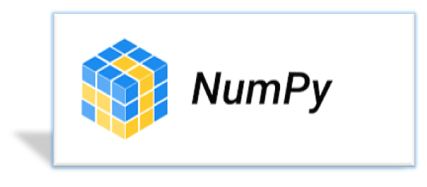  
</div>

Sadržaj:
1. [Operacije nad vektorima i matricama](#Operacije-nad-vektorima-i-matricama-u-NumPy-biblioteci)
    1. [Skaliranje `*`](#Skaliranje-vektora-i-matrica)
        1. [Napomena o listama i `*`](#Napomena-o-listama-i-`*`)
    1. [Sabiranje `+`](#Sabiranje-vektora-i-matrica)
        1. [Napomena o listama i `+`](#Napomena-o-listama-i-`+`)
    1. [Transponovanje `transpose` ili `T`](#Transponovanje-vektora-i-matrica)
    1. [Množenje matrica `dot`, `outer` i `@`](#Množenje-matrica)
    1. [Inverzna matrica i determinanta `linalg.inv` i `linalg.det`](#Inverzna-matrica)
    1. [Specijalne operacije nad NumPy nizovima](#Specijalne-operacije-nad-NumPy-nizovima)
1. [Pristup elementima niza](#Pristup-elementima-niza)   


U ovom odeljku bavićemo se osnovnim operacijama nad NumPy nizovima i načinima pristupa pojedinim delovima niza.

In [1]:
import numpy as np
import matplotlib as mplb
import matplotlib.pyplot as plt

## Operacije nad vektorima i matricama u NumPy biblioteci

Osnovne operacije vektorskog prostora i operacije nad matricama podržane su u radu sa NumPy nizovima. Uslovi pod kojima su ove operacije definisane odnose se i na uslove izvršenja operacija iz NumPy biblioteke. Osim toga, ovde ukazujemo na neke bitne operacijske razlike između dva tipa podataka - liste i NumPy nizovi, a koje mogu da posluže za jednostavno definisanje nizova preko lista. Naredna tabela sadrži izbor važnijih funkcija i metoda kojima su podržane operacije linearne algebre. Iscrpna lista rutina može se pregledati u [dokumentacionom centru](https://numpy.org/doc/stable/reference/routines.html).

|Operacija|Simbol|
|---|---|
|Sabiranje|`+`|
|Oduzimanje|`-`|
|Skaliranje|`*`|
|Transponovanje|`transpose()` ili `.T`|
|Unutrašnji (skalarni) proizvod|`dot()`|
|Kompleksni skalarni proizvod|`vdot()`|
|Spoljašnji proizvod vektora|`outer()`|
|Množenje matrica|`@`|
|Determinanta|`linalg.det()`|
|Trag matrice|`trace()`|
|Inverzna matrica|`linalg.inv()`|
|Rešenje matrične jednačine $AX=B$|`linalg.solve(A,B)`|
|Norma vektora|`linalg.norm()`|

U nastavku kroz primere prikazaćemo kako funkcionišu navedene funkcije. Osim toga, postoje i zgodne skraćenice za neke specijalne slučajeve ovih operacija.

### Skaliranje vektora i matrica

Množenje svih elemenata NumPy niza jednim brojem, realnim ili kompleksnim, vrši se simbolom `*`.

In [2]:
u=np.array([1,0,1,-1])
2*u

array([ 2,  0,  2, -2])

In [3]:
(1+1j)*u

array([ 1.+1.j,  0.+0.j,  1.+1.j, -1.-1.j])

In [4]:
matrica=np.array([[1,2,3],[4,5,6]])
print(matrica)
-2.3*matrica

[[1 2 3]
 [4 5 6]]


array([[ -2.3,  -4.6,  -6.9],
       [ -9.2, -11.5, -13.8]])

In [5]:
matrica/3

array([[0.33333333, 0.66666667, 1.        ],
       [1.33333333, 1.66666667, 2.        ]])

#### Napomena o listama  i  `*`

Interesantno je uporediti dejstvo operacije, tj. simbola `*` kada je argument lista.

In [6]:
4*[1,2]

[1, 2, 1, 2, 1, 2, 1, 2]

In [7]:
[1,2]*4

[1, 2, 1, 2, 1, 2, 1, 2]

In [8]:
3*[[1]]

[[1], [1], [1]]

In [9]:
4*[[1,0],[2,-1]]

[[1, 0], [2, -1], [1, 0], [2, -1], [1, 0], [2, -1], [1, 0], [2, -1]]

<div class="alert alert-block alert-info">
<b>Napomena:</b> Rezultat "množenja" liste je višestruko nadovezivanje (konkatenacija) elemenata te liste. </div>

To se može iskoristiti za automatizovano kreiranje vektora i matrica.

In [10]:
primer=np.array([4*[1],4*[2]])
primer

array([[1, 1, 1, 1],
       [2, 2, 2, 2]])

### Sabiranje vektora i matrica

Sabiranje elemenata (član-po-član) dva NumPy niza obavlja se operacijom `+`. Kao što `*` deluje različito na nizove i liste, slična razlika postoji i za operaciju `+`. Primeri primene ove operacije nad različitim objektima dati su u nastavku.

In [11]:
print(u)
v=np.array([2,-1,2,1])
u+v                       #sabiranje vektora

[ 1  0  1 -1]


array([ 3, -1,  3,  0])

In [12]:
u-v                       #oduzimanje vektora

array([-1,  1, -1, -2])

In [13]:
1j*u+2.4*v             #linearna kombinacija vektora

array([ 4.8+1.j, -2.4+0.j,  4.8+1.j,  2.4-1.j])

In [14]:
matrica2=np.array([[-1,0,1],[2,3.1,-1]])
-matrica+3*matrica2      #linearna kombinacija matrica

array([[-4. , -2. ,  0. ],
       [ 2. ,  4.3, -9. ]])

#### Napomena o listama i  `+`

Operacija `+` nad listama vrši njihovu konkatenaciju. Jasno je da u tom slučaju `+` nije komutativna operacija.

In [15]:
[1,0,1,-1]+[2,-1,2,1]     #nadovezivanje listi

[1, 0, 1, -1, 2, -1, 2, 1]

In [16]:
[2,-1,2,1]+[1,0,1,-1]     #nadovezivanje listi nije komutativno

[2, -1, 2, 1, 1, 0, 1, -1]

In [17]:
[1,0,1,-1]+[2,-1,2,1,3,4]     #nadovezivanje listi

[1, 0, 1, -1, 2, -1, 2, 1, 3, 4]

In [18]:
4*[1]+4*[2]    #kombinovanje operacija + i * za formiranje listi

[1, 1, 1, 1, 2, 2, 2, 2]

In [19]:
2*(2*[1]+2*[-1])

[1, 1, -1, -1, 1, 1, -1, -1]

In [20]:
2*[2*[1]+2*[-1]]

[[1, 1, -1, -1], [1, 1, -1, -1]]

In [21]:
4*[1]+3*[2]+2*[0]

[1, 1, 1, 1, 2, 2, 2, 0, 0]

In [22]:
lista=[8*[1]]+6*[[1]+6*[0]+[1]]+[8*[1]]
A=np.array(lista)
A

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

In [23]:
lista1=[4*[0,1]]
lista2=[4*[1,0]]
B=np.array(4*(lista1+lista2))
B

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

<div class="alert alert-block alert-info">
<b>Zaključak:</b> Za sabiranje vektora ili matrica, tj. NumPy nizova neophodno je da oni budu istih dimenzija. Konkatenacija listi vrši se nad listama proizvoljnih dužina. </div>

### Transponovanje vektora i matrica

Funkcija `transpose()` i atribut `.T` imaju efekta samo nad višedimenzionalnim nizovima. Ukoliko se transponovanje primeni na jednodimenzionalni NumPy niz ono neće proizvesti nikakav efekat.

In [24]:
print(v)
print(v.shape)     #v je jednodimenzionalni niz 
np.transpose(v)                   

[ 2 -1  2  1]
(4,)


array([ 2, -1,  2,  1])

In [25]:
print(v.T)
print((v.T).shape)

[ 2 -1  2  1]
(4,)


In [26]:
np.transpose([v])                 #[v] je dvodimenzionalni niz 1x4 pod dejstvom naredbe transpose

array([[ 2],
       [-1],
       [ 2],
       [ 1]])

In [27]:
(v.reshape(1,4)).T

array([[ 2],
       [-1],
       [ 2],
       [ 1]])

In [28]:
kolona=np.array([[1+1j],[2],[3],[3-2j]])
np.transpose(kolona)

array([[1.+1.j, 2.+0.j, 3.+0.j, 3.-2.j]])

In [29]:
print(kolona)
(kolona.conj()).T   #konjugovano transponovanje

[[1.+1.j]
 [2.+0.j]
 [3.+0.j]
 [3.-2.j]]


array([[1.-1.j, 2.-0.j, 3.-0.j, 3.+2.j]])

In [30]:
A = np.array([[1,2,3],[3,4,5]]) 
print(A)
np.transpose(A)

[[1 2 3]
 [3 4 5]]


array([[1, 3],
       [2, 4],
       [3, 5]])

In [31]:
A.T

array([[1, 3],
       [2, 4],
       [3, 5]])

### Množenje matrica

Izdvajamo najvažnije oblike operacije množenja matrica:
1.  unutrašnji (skalarni) proizvod vektora  $\qquad\begin{bmatrix}a_1&a_2&\dots&a_n\end{bmatrix}\begin{bmatrix}b_1\\b_2\\\vdots\\b_n\end{bmatrix}=\displaystyle\sum_{k=1}^na_kb_k,$
<p>&nbsp;</p>
1.  spoljašnji (tenzorski) proizvod vektora  $\qquad\begin{bmatrix}a_1\\a_2\\\vdots\\a_m\end{bmatrix}\begin{bmatrix}b_1&b_2&\dots&b_n\end{bmatrix}=
\begin{bmatrix}a_1b_1&a_1b_2&\dots&a_1b_n\\a_2b_1&a_2b_2&\dots&a_2b_n\\\vdots&\vdots&&\vdots\\a_mb_1&a_mb_2&\dots&a_mb_n\end{bmatrix},$ 
<p>&nbsp;</p>
1. proizvod matrice i vektora je linearna kombinacija kolona te matrice $$\begin{bmatrix}a_{11}&a_{12}&\dots&a_{1n}\\a_{21}&a_{22}&\dots&a_{2n}\\
\vdots&\vdots&&\vdots\\a_{m1}&a_{m2}&\dots&a_{mn}\end{bmatrix}\begin{bmatrix}b_1\\b_2\\\vdots\\b_n\end{bmatrix}
=b_1\begin{bmatrix}a_{11}\\a_{21}\\\vdots\\a_{m1}\end{bmatrix}+b_2\begin{bmatrix}a_{12}\\a_{22}\\\vdots\\a_{m2}\end{bmatrix}
+\dots+b_n\begin{bmatrix}a_{1n}\\a_{2n}\\\vdots\\a_{mn}\end{bmatrix}$$
<p>&nbsp;</p>
$$=
\begin{bmatrix}b_1a_{11}+b_2a_{12}+\dots+b_na_{1n}\\b_1a_{21}+b_2a_{22}+\dots+b_na_{2n}\\
\vdots\\b_1a_{m1}+b_2a_{m2}+\dots+b_na_{mn}\end{bmatrix},$$
<p>&nbsp;</p>
1.  proizvod dve matrice  $\qquad\begin{bmatrix}a_{11}&a_{12}&\dots&a_{1n}\\a_{21}&a_{22}&\dots&a_{2n}\\
\vdots&\vdots&&\vdots\\a_{m1}&a_{m2}&\dots&a_{mn}\end{bmatrix}
\begin{bmatrix}b_{11}&b_{12}&\dots&b_{1p}\\b_{21}&b_{22}&\dots&b_{2p}\\
\vdots&\vdots&&\vdots\\b_{n1}&b_{n2}&\dots&b_{np}\end{bmatrix}
=\begin{bmatrix}c_{11}&c_{12}&\dots&c_{1p}\\c_{21}&c_{22}&\dots&c_{2p}\\
\vdots&\vdots&&\vdots\\c_{m1}&c_{m2}&\dots&c_{mp}\end{bmatrix}$
<p>&nbsp;</p>
$$\mbox{gde su }\qquad c_{ij}=\begin{bmatrix}a_{i1}&a_{i2}&\dots&a_{in}\end{bmatrix}\begin{bmatrix}b_{1j}\\b_{2j}\\\vdots\\b_{nj}\end{bmatrix},
\quad i=1,2,\dots,m,\quad j=1,2,\dots,n.$$

Funkcije kojima se navedene operacije množenja izračunavaju su `dot`, `outer` i `@`. Prve dve operacije su pogodne za primenu na jednodimenzionalnim NumPy nizovima, mada imaju svoje značenje i u dvodimenzionalnom slučaju. Iako `dot` operacija može da se primenjuje i u svojstvu operacije `@`, preporuka je da se množenje dve matrice obavlja operacijom `@`.
Prilikom upotrebe implementiranih operacija za rad sa NumPy nizovima kojima se navedeni proizvodi izračunavaju potrebno je voditi računa o dimenzijama nizova činilaca. Dejstvo samih funkcija `dot`, `outer` i `@` upoznaćemo kroz primere.

In [32]:
print("v=",v," , ","u=",u)
print(v.shape)
print(u.shape)
np.dot(v,u)   #unutrašnji proizvod jednodimenzionalnih vektora

v= [ 2 -1  2  1]  ,  u= [ 1  0  1 -1]
(4,)
(4,)


3

In [33]:
np.dot(v.reshape(1,4),u.reshape(4,1)) #unutrašnji proizvod vektora-vrste i vektora-kolone

array([[3]])

In [34]:
v.reshape(1,4)@u.reshape(4,1) #unutrašnji proizvod vektora-vrste i vektora-kolone

array([[3]])

In [35]:
v@u  #operacija proizvoda matrica deluje kao unutrašnji proizvod na jednodimenzionalne vektore istih dužina

3

Zaključujemo da za izračunavanje unutrašnjeg proizvoda, tj. rezultata koji će dati baš broj, a ne niz, treba voditi računa o broju dimenzija činilaca. Osim toga, funkcije `dot` i `@` imaju ekvivalentno dejstvo u analiziranim situacijama.

In [36]:
w=np.array([1,0,1,0,-1,1])
print(w.shape)
np.outer(v,w)  #spoljašnji proizvod jednodimenzionalnih vektora

(6,)


array([[ 2,  0,  2,  0, -2,  2],
       [-1,  0, -1,  0,  1, -1],
       [ 2,  0,  2,  0, -2,  2],
       [ 1,  0,  1,  0, -1,  1]])

In [37]:
np.outer(w,v)  #spoljašnji proizvod jednodimenzionalnih vektora

array([[ 2, -1,  2,  1],
       [ 0,  0,  0,  0],
       [ 2, -1,  2,  1],
       [ 0,  0,  0,  0],
       [-2,  1, -2, -1],
       [ 2, -1,  2,  1]])

In [38]:
v@w  # operacija množenja matrica ovde ne može da zameni spoljašnji proizvod vektora
#proizvod elemenata dimenzija (4,) i (6,)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 4)

In [39]:
v.reshape(4,1)@w  #proizvod elemenata dimenzija (4,1) i (6,)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 1)

In [40]:
v.reshape(4,1)@w.reshape(1,6)  #spoljašnji proizvod operacijom @

array([[ 2,  0,  2,  0, -2,  2],
       [-1,  0, -1,  0,  1, -1],
       [ 2,  0,  2,  0, -2,  2],
       [ 1,  0,  1,  0, -1,  1]])

Proverićemo sada funkcionisanje operacije matrica $\cdot$ jednodimenzionalni vektor kroz primere.

In [41]:
A=np.array([[1,2,-1,3],[0,-2,1,-1],[1,1,1,1]])
print(A.shape)
print(v.shape)
u=np.dot(A,v)           #dot ima ulogu i množenja matrica     
print(u.shape)

(3, 4)
(4,)
(3,)


In [42]:
A@v

array([1, 3, 4])

In [43]:
u@A

array([5, 0, 6, 4])

In [44]:
np.dot(u,A)

array([5, 0, 6, 4])

Množenje dvodimenzionalnih nizova, tj. nizova koji predstavljaju matrice, vektore-vrste, vektore-kolone, odvija se na uobičajen način prema matematičkim definicijama. 

In [45]:
A = np.array([[1,2,3],[3,4,5]]) 
B=np.array([[1,2],[3,4]])
B@A

array([[ 7, 10, 13],
       [15, 22, 29]])

In [46]:
np.dot(B,A)

array([[ 7, 10, 13],
       [15, 22, 29]])

In [47]:
kolona=(np.arange(-1,2)).reshape(3,1)
A@kolona

array([[2],
       [2]])

In [48]:
vrsta=(np.array([-1,2])).reshape(1,2)
vrsta@A

array([[5, 6, 7]])

Proverićemo i ponašanje funkcije `outer` izvan uvedene matematičke definicije. Naime, ova operacija se može primeniti i na dve matrice proizvoljnih dimenzija. Tom prilikom dolazi do prevođenja matrica u vektore nad kojima se zatim sprovodi operacija spoljašnjeg proizvoda.

In [49]:
print("A=",A)
print("B=",B)
np.outer(B,A)

A= [[1 2 3]
 [3 4 5]]
B= [[1 2]
 [3 4]]


array([[ 1,  2,  3,  3,  4,  5],
       [ 2,  4,  6,  6,  8, 10],
       [ 3,  6,  9,  9, 12, 15],
       [ 4,  8, 12, 12, 16, 20]])

In [50]:
np.outer(B.reshape(4,),A.reshape(6,))

array([[ 1,  2,  3,  3,  4,  5],
       [ 2,  4,  6,  6,  8, 10],
       [ 3,  6,  9,  9, 12, 15],
       [ 4,  8, 12, 12, 16, 20]])

In [51]:
np.outer(A,B)

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16],
       [ 5, 10, 15, 20]])

In [52]:
np.outer(A.reshape(6,),B.reshape(4,))

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16],
       [ 5, 10, 15, 20]])

In [53]:
np.outer(kolona,A)

array([[-1, -2, -3, -3, -4, -5],
       [ 0,  0,  0,  0,  0,  0],
       [ 1,  2,  3,  3,  4,  5]])

In [54]:
np.outer(vrsta,A)

array([[-1, -2, -3, -3, -4, -5],
       [ 2,  4,  6,  6,  8, 10]])

Na osnovu sprovedenih eksperimenata zaključujemo da za uspešnu realizaciju operacija `dot` i `@` mora da se vodi računa o pravilu unutrašnjeg indeksa. Efekti ove dve NumPy funkcije su ekvivalentni. Same operacije se sprovode prema zakonu:
\begin{align}
&u_{(m,)}v_{(m,)}=skalar       &&A_{(m,n)}B_{(n,p)}=C_{(m,p)},\\
&u_{(m,)}A_{(m,n)}=v_{(n,)}    &&A_{(m,n)}v_{(n,)}=u_{(m,)}
\end{align}

Operacija `outer` linearizuje svoje argumente, tj. tretira ih kao jednodimenzionalne nizove i tada sprovede spoljašnji proizvod. 

### Inverzna matrica

Izračunavanje inverzne matrice kvadratne matrice, kao i njene determinante su funkcije podmodula [Linalg](https://numpy.org/doc/stable/reference/routines.linalg.html). Njihovu primenu prikazaćemo na jednostavnom primeru matrice 
$B=\begin{bmatrix}1&2\\3&4\end{bmatrix}$ čije su $\quad\det(B)=4-6=-2\quad$ i $\quad B^{-1}=-\dfrac12\begin{bmatrix}4&-2\\-3&1\end{bmatrix}
=\begin{bmatrix}-2&1\\3/2&-1/2\end{bmatrix}$

In [55]:
C = np.linalg.inv(B) 
print("B=",B)
print('C=',C)
print('BC=',B@C)
print('BC=',np.around(B@C,3)) #ispis rezultata zaokruzen na 3 decimalna mesta
print("det(B)=",np.linalg.det(B))
print("det(B)=",np.around(np.linalg.det(B),3))

B= [[1 2]
 [3 4]]
C= [[-2.   1. ]
 [ 1.5 -0.5]]
BC= [[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]
BC= [[1. 0.]
 [0. 1.]]
det(B)= -2.0000000000000004
det(B)= -2.0


### Specijalne operacije nad NumPy nizovima

Osim standardnih matričnih operacija, NumPy omogućava i član-po-član operacije. To znači da se skalarne operacije i funkcije mogu primenjivati jednim pozivom funkcije na sve elemente nekog NumPy niza.

In [56]:
u=np.array([1,0,1,-1])
print("u=",u)
print("v=",v)
u*v        #član-po-član množenje elemenata, tj. Adamarov proizvod matrica

u= [ 1  0  1 -1]
v= [ 2 -1  2  1]


array([ 2,  0,  2, -1])

In [57]:
u/v        #član-po-član deljenje elemenata

array([ 0.5, -0. ,  0.5, -1. ])

In [58]:
u+4       #dodavanje iste vrednosti svim elementima niza

array([5, 4, 5, 3])

In [59]:
u**2     #kvadriranje svih elemenata niza

array([1, 0, 1, 1], dtype=int32)

**Primer 1.** Izračunaćemo vrednosti funkcije $f(x)=\dfrac{x^2}{2+x}+3\sin x$ za niz ulaznih argumenata $x\in\{-1,0,1,3.5\}.$ U tome će nam pomoći član-po-član definisane operacije i funkcije nad NumPy nizovima.

In [60]:
xk=np.array([-1,0,1,3.5])
fk=(xk**2)/(2+xk)+3*np.sin(xk)
print(xk)
print(fk)

[-1.   0.   1.   3.5]
[-1.52441295  0.          2.85774629  1.17492304]


Pojedinačne rezultate vrednosti funkcije možemo da proverimo izračunavanjem.

In [61]:
x=-1
(x**2)/(2+x)+3*np.sin(x)

-1.5244129544236893

Opisane član-po-član operacije i funkcije koje smo koristili nad vektorima mogu se upotrebiti i nad matricama.

In [62]:
A=np.array([[1,2,3],[3,2,1],[1,0,1]])
B=np.array([[1,-1,2],[1,-2,1],[4,1,2]])
print("A*B=",A*B)     #član-po-član množenje elemenata - Adamarov proizvod dve matrice
print("A/B=",A/B)     #član-po-član deljenje elemenata

A*B= [[ 1 -2  6]
 [ 3 -4  1]
 [ 4  0  2]]
A/B= [[ 1.   -2.    1.5 ]
 [ 3.   -1.    1.  ]
 [ 0.25  0.    0.5 ]]


In [63]:
matrica=np.array([[1,2,3],[4,5,6]])
print(matrica)
matrica+2   #dodavanje broja svim elementima matrice

[[1 2 3]
 [4 5 6]]


array([[3, 4, 5],
       [6, 7, 8]])

Slično, nad matricama mogu se sprovoditi vektor-po-vektor operacije. U svim ćelijama u nastavku desni operand može da bude NumPy niz. Lista je postavljena samo zbog kraćeg kucanja.

In [64]:
matrica+[-1,-1,2]  #zbog poklapanja dimenzija vršiće se dodavanje elemenata desne liste svakoj vrsti matrice

array([[0, 1, 5],
       [3, 4, 8]])

In [65]:
[-1,-1,2]+matrica  #zbog poklapanja dimenzija vršiće se dodavanje elemenata leve liste svakoj vrsti matrice

array([[0, 1, 5],
       [3, 4, 8]])

In [66]:
matrica+np.array([-1,-1,2])

array([[0, 1, 5],
       [3, 4, 8]])

In [67]:
matrica+[[2],[-2]] #zbog poklapanja dimenzija vršiće se dodavanje elemenata desne liste svakoj koloni matrice

array([[3, 4, 5],
       [2, 3, 4]])

In [68]:
matrica+np.array([[2],[-2]])

array([[3, 4, 5],
       [2, 3, 4]])

In [69]:
matrica*[-1,-2,2.3] #pokomponentno množenje elemenata liste i elemenata svake vrste matrice

array([[ -1. ,  -4. ,   6.9],
       [ -4. , -10. ,  13.8]])

In [70]:
matrica*[[2],[-2]] #pokomponentno množenje elemenata liste i elemenata svake kolone matrice

array([[  2,   4,   6],
       [ -8, -10, -12]])

Osim toga, ove deo-po-deo operacije mogu da se kombinuju nad vektorima na specijalan način.

In [71]:
kolona=np.array([[0],[1],[-1]])
vrsta=np.array([1,2,3])
kolona+vrsta

array([[1, 2, 3],
       [2, 3, 4],
       [0, 1, 2]])

In [72]:
vrsta+kolona

array([[1, 2, 3],
       [2, 3, 4],
       [0, 1, 2]])

In [73]:
kolona*vrsta

array([[ 0,  0,  0],
       [ 1,  2,  3],
       [-1, -2, -3]])

In [74]:
vrsta*kolona

array([[ 0,  0,  0],
       [ 1,  2,  3],
       [-1, -2, -3]])

In [75]:
kolona**vrsta

array([[ 0,  0,  0],
       [ 1,  1,  1],
       [-1,  1, -1]], dtype=int32)

In [76]:
vrsta.astype(np.float64)**kolona

array([[1.        , 1.        , 1.        ],
       [1.        , 2.        , 3.        ],
       [1.        , 0.5       , 0.33333333]])

Obrađeni primeri u ovoj i prethodnoj radnoj svesci ukazuju da vektori-vrste dvodimenzionalnih nizova imaju određenu prednost u radu, dok se za rad sa vektorima-kolonama povremeno mora to posebno da naznači.

Još neki primeri pokomponentne primene osnovnih funkcija dati su u nastavku. Primena navedenih funkcija je nezavisna od toga da li je u primeru naveden jednodimenzionalni ili dvodimenzionalni niz kao argument. Svako od predstavljenih izračunavanja može da bude deo nekog složenijeg izraza. Bitno je samo da bude ispoštovano pravilo jednakih dimenzija tamo gde je to potrebno: sabiranje, vektor po vektor sabiranje, pokomponentno ili vektor po vektor množenje i deljenje, itd.

In [77]:
vektor=np.arange(6)
print(vektor)

[0 1 2 3 4 5]


In [78]:
vektor//2

array([0, 0, 1, 1, 2, 2], dtype=int32)

In [79]:
vektor%3

array([0, 1, 2, 0, 1, 2], dtype=int32)

In [80]:
vektor**2

array([ 0,  1,  4,  9, 16, 25], dtype=int32)

In [81]:
2**vektor

array([ 1,  2,  4,  8, 16, 32], dtype=int32)

In [82]:
matrica**2

array([[ 1,  4,  9],
       [16, 25, 36]], dtype=int32)

In [83]:
np.exp(vektor)

array([  1.        ,   2.71828183,   7.3890561 ,  20.08553692,
        54.59815003, 148.4131591 ])

In [84]:
matrica=np.array([[np.pi,0,np.pi/3],[-np.pi/4,-2*np.pi/3,np.e]])
print(matrica)

[[ 3.14159265  0.          1.04719755]
 [-0.78539816 -2.0943951   2.71828183]]


In [85]:
np.sin(matrica)

array([[ 1.22464680e-16,  0.00000000e+00,  8.66025404e-01],
       [-7.07106781e-01, -8.66025404e-01,  4.10781291e-01]])

**Primer 2.** Kreiraćemo promenljivu `pom` kao niz slučajnih vrednosti. Potražićemo maksimalan raspon vrednosti unutar ovog niza.

а) Sprovešćemo sledeći postupak za određivanje raspona vrednosti unutar niza `pom`:
1. Odredićemo minimalnu vrednost `minpom` niza `pom` upotrebom odgovarajuće funkcije NumPy modula.
2. Pronađenu minimalnu vrednost `minpom` oduzećemo od svih elemenata niza `pom`, Na taj način kreiraćemo sadržaj novog niza `c`.
3. Odredićemo maksimalnu vrednost `raspon` niza `c` upotrebom odgovarajuće funkcije NumPy modula.

In [86]:
pom=3*np.random.rand(10,)+2
pom

array([2.40501384, 3.36949925, 2.69483011, 4.61755591, 2.45866946,
       4.05031934, 3.31145288, 2.66813396, 3.09437913, 3.97035399])

In [87]:
minpom=np.min(pom)
c=pom-minpom
raspon=np.max(c)
print(raspon)

2.2125420702235172


## Pristup elementima niza 

Operator indeksiranja `[ ]` odabira pojedinačne elemente u nizu ili njegove delove. Time je omogućen pristup pojedinačnim elementima i kao i grupama njih bilo za njihovo čitanje, bilo za izmenu sadržaja. Indeksiranjem se ne može menjati dužina NumPy niza.

<div class="alert alert-block alert-info">
<b>Napomena:</b> U radu sa nizovima voditi računa o opsegu indeksa!
Prvi element liste ili niza je indeksa 0.</div>

**Задатак 1.** Креирати низ бројева $a=[0, 1, ..., 8]$ неком од наредби модула NumPy за аутоматско генерисање вредности аритметичког низа. Од њега креирати матрицу $M\in\mathcal{M}_{3\times3},$ $M=\begin{bmatrix}0&1&2\\3&4&5\\6&7&8\end{bmatrix}.$ Проверити да ли промене неког елемента низа $a$ доводе до промена у садржају матрице $M.$

In [88]:
a=np.arange(9)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [89]:
M=a.reshape(3,3)
M

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [90]:
a[3]=100
M

array([[  0,   1,   2],
       [100,   4,   5],
       [  6,   7,   8]])

**Primer 3.** Na narednoj slici data je šema indeksiranja NumPy niza $[1,-1,0,-2,2,3,4,-1,1,0].$  Elementi niza su unutar bele duge vrste sa crnim granicama.  Ispod i iznad su naznačene vrednosti pozicija, tj. vrednosti indeksa odgovarajućih elemenata:
- gornji prostor opisuje indeksiranje unapred, tj. brojanje od početnog (nultog) elementa,
- donji prostor opisuje indeksiranje unazad, tj. odbrojavanjem od poslednjeg elementa (-1).

Plava polja označavaju opsege vrednosti indeksa. 

<div>
   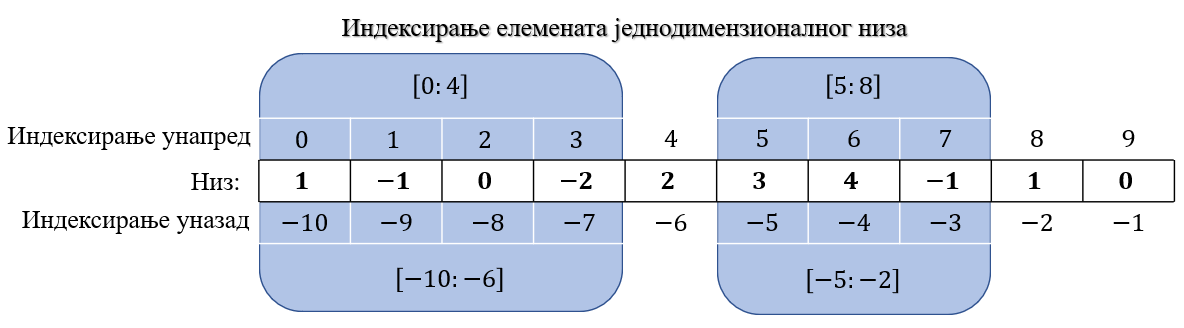  
</div>

Iz šeme vidimo da indeksiranje pojedinačnih delova niza počinje od broja 0 i sukcesivno se nastavlja, kada brojimo elemente na taj način. Bilo kojem pojedinačnom elementu ovog niza (za čitanje ili promenu vrednosti) pristupamo navođenjem imena niza i indeksa elementa unutar uglastih zagrada `[ ]`.

In [91]:
niz=np.array([1,-1,0,-2,2,3,4,-1,1,0])
print(niz[0]," , ",niz[6])
niz[6]=niz[6]//2
niz

1  ,  4


array([ 1, -1,  0, -2,  2,  3,  2, -1,  1,  0])

Vratićemo elemente niza na početne vrednosti kako bi izlazi narednih ćelija odgovarali prikazu na slici.

In [92]:
niz=np.array([1,-1,0,-2,2,3,4,-1,1,0])

Osim pojedinačnog pristupa moguće je indeksiranje i grupe elemenata niza. U tom slučaju se odgovarajući indeksi navode kao lista (ili niz) unutar operatora indeksiranja `[ ]`. Redosled navođenja indeksa ne mora da poodleže nikakvom pravilu, ali indeksi moraju da budu iz opsega veličine niza. Za konkretnu promenljivu `niz` maksimalna vrednost indeksa je 9.

In [93]:
print(niz)
niz[[0,2,8,1,2,2,0]]

[ 1 -1  0 -2  2  3  4 -1  1  0]


array([ 1,  0,  1, -1,  0,  0,  1])

In [94]:
niz[2*[1,3]+3*[6,4,9]]

array([-1, -2, -1, -2,  4,  2,  0,  4,  2,  0,  4,  2,  0])

In [95]:
niz[np.array([0,2,8,1])]

array([ 1,  0,  1, -1])

In [96]:
niz[10]

IndexError: index 10 is out of bounds for axis 0 with size 10

In [97]:
niz[10%niz.size]

1

Kada grupa indeksa podleže nekim pravilnostima možemo da koristimo olakšice. U te svrhe koristi se kombinacija operatora indeksiranja i operatora listanja `:`. Ovaj operator ima slične karakteristike `arange` naredbe.  

Format $[n:m]$ vraća deo niza počevši od elementa sa indeksom $n$ pa do elementa sa indeksom $m-1.$ Misli se na Python način indeksiranja koji počinje brojanje od 0, ili negativno indeksiranje. 

Ukoliko se ne navede početni indeks $n$ podrazumevana vrednost je $0.$ Ukoliko se ne navede drugi indeks $m,$ podrazumeva se da mu je vrednost kraj niza. U takvoj situaciji je i poslednji element uključen.

Indeksiranje u formatu $[n:m:k]$ daje svaki $k-$ti element počevši od onog sa indeksom $n.$

<div class="alert alert-block alert-info">
<b>Napomena:</b> Voditi računa da se poslednji indeks $m$ u opsegu $[n:m]$ ili $[n:m:k]$ ne koristi. To važi za indeksiranje unapred i indeksirnje unazad. Uključivanje poslednjeg elementa niza moguće je u formatu $[n:]$ ili $[n::k]$ </div>

In [98]:
print(niz)

[ 1 -1  0 -2  2  3  4 -1  1  0]


In [99]:
niz[0:4]   #elementi od početka do onog sa indeksom 3

array([ 1, -1,  0, -2])

In [100]:
niz[:4]    #elementi od početka do onog sa indeksom 3

array([ 1, -1,  0, -2])

In [101]:
niz[5:8]  #elementi počevši od onog sa indeksom 5 do onog sa indeksom 7

array([ 3,  4, -1])

In [102]:
niz[5:]   #elementi počevši od onog sa indeksom 5 do kraja niza

array([ 3,  4, -1,  1,  0])

In [103]:
niz[::2] #elementi od početka do kraja, svaki drugi

array([1, 0, 2, 4, 1])

In [104]:
niz[::-1] #elementi od početka do kraja, u obrnutom redosledu

array([ 0,  1, -1,  4,  3,  2, -2,  0, -1,  1])

Specijalno, svi elementi jednodimenzionalnog niza dobijaju se ne navođenjem nijedne granice u operatoru listanja. Ovo svojstvo je bitno za nizove više dimenzija.

In [105]:
niz[:]

array([ 1, -1,  0, -2,  2,  3,  4, -1,  1,  0])

Elementi objekata ovog tipa mogu takođe i da se indeksiraju sa kraja. Negativne vrednosti indeksa broje elemente zdesna nalevo. Način korišćenja pojedinačnog pristupa ili operatora listanja `:` odgovara prethodno opisanom. Njegovo dejstvo prikazaćemo na narednom primeru.

In [106]:
vektor=np.arange(-5,6)
print(vektor)
print(vektor[0])
print(vektor[6])
print(vektor[-1])
print(vektor[-4])

[-5 -4 -3 -2 -1  0  1  2  3  4  5]
-5
1
5
2


In [107]:
print(vektor)
print(vektor[:-4])
print(vektor[-6:])
print(vektor[-6::2])

[-5 -4 -3 -2 -1  0  1  2  3  4  5]
[-5 -4 -3 -2 -1  0  1]
[0 1 2 3 4 5]
[0 2 4]


Višestruko indeksiranje elemenata možemo da koristimo i za izmenu njihovog sadržaja, ne samo prikaz.

In [108]:
print(vektor)
vektor[3]=5
print(vektor)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]
[-5 -4 -3  5 -1  0  1  2  3  4  5]


In [109]:
print(vektor)
vektor[2:-3]=[2,3,4,1,2,3]
print(vektor)
vektor[0:6]=2*[2,1,2]
print(vektor)

[-5 -4 -3  5 -1  0  1  2  3  4  5]
[-5 -4  2  3  4  1  2  3  3  4  5]
[2 1 2 2 1 2 2 3 3 4 5]


Ukoliko je potrebno izdvajanje elemenata koji nisu uzastopni, to postižemo navođenjem liste indeksa pod operatorom indeksiranja. Ovakav način indeksiranja je pogodan za zamenu mesta vrednosti elemenata u listi jer ne zahteva upotrebu pomoćnih promenljivih.

Podsetimo se da Python dozvoljava istovremenu dodelu vrednosti više promenljivih.

In [110]:
a,b=3,4
print(a," ",b)

3   4


U klasičnim programskim jezicima koji ne dozvoljavaju istovremenu definiciju vrednosti više promenljivih, zamena vrednosti dve promenljive mora da se odvija iz nekoliko koraka i uz pomoć medju promenljive. 

In [111]:
pom=a
a=b
b=pom
print(a," ",b)

4   3


Istovremena dodela vrednosti olakšava ovaj postupak zamene sadržaja dve ili više promenljivih.

In [112]:
a,b = b,a

In [113]:
print(a," ",b)

3   4


In [114]:
c=5

In [115]:
a,b,c=c,a,b
print(a," ",b," ",c)

5   3   4


Na sličan način funkcioniše zamena sadržaja elemenata i delova NumPy niza.

In [116]:
vektor=np.arange(11)
print(vektor)
vektor[[2,4]]=vektor[[4,2]]  #istovremena zamena mesta dve vrednosti
print(vektor)
vektor[[0,1,3,5]]=vektor[[5,3,1,0]] #istovremena zamena mesta više vrednosti
print(vektor)

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  4  3  2  5  6  7  8  9 10]
[ 5  3  4  1  2  0  6  7  8  9 10]


**Primer 4.** Strategija "podeli pa vladaj" jedna je od najmoćnijih algoritamskih paradigmi za dizajn efikasnih algoritama. Ideja je zasnovana na podeli problema visoke dimenzionalnosti na više problema istog tipa ali niže dimenzionalnosti. Svaki od ovih potproblema može ponovo da se razdvoji u potprobleme, itd. Postupak usitnjavanja sprovodi se do nivoa kada su dobijeni potproblemi dovoljno mali. Rešenje polaznog problema tada se dobija kombinovanjem rešenja potproblema vraćajući se unazad kroz hijerarhiju. Ovu ideju ilustrovaćemo na primeru sume $n+1=2^k$ brojeva, $S=\displaystyle\sum_{k=0}^na_k.$ Uobičajen način za izračunavanje sume je akumulacija kroz iteracije.
$$S_0=a_0,\qquad S_k=S_{k-1}+a_k,\ k=1,\dots,n.$$

In [117]:
from timeit import default_timer as timer
import numpy.random as rndm

In [118]:
k=20
n=2**k
a=rndm.rand(n)  #generisanje 2^k slucajnih brojeva iz opsega [0,1)

In [119]:
start = timer()
s=a[0]
for i in range(1,n):
    s=s+a[i]
end = timer()
print("Vreme izvrsenja algoritma: ",end - start,"sec")
print("Suma je: ",s)

Vreme izvrsenja algoritma:  0.3395894999994198 sec
Suma je:  524137.7592966442


Drugi način je sumiranje koje dozvoljava paralelizaciju procesa tako da se čitav postupak odvija u $k$ iteracija. Šema takvog sumiranja data je na primeru $k=3.$
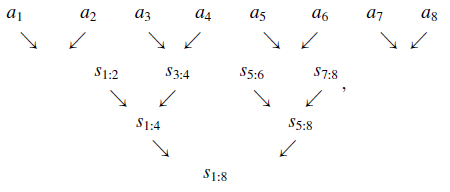

In [120]:
start = timer()
s=a.copy()
for i in range(k):
    s=s[0::2]+s[1::2]
end = timer()
print("Vreme izvrsenja algoritma: ",end - start,"sec")
print("Suma je: ",s)

Vreme izvrsenja algoritma:  0.0073374000003241235 sec
Suma je:  [524137.75929663]


Uočavamo razliku u vremenima izvršenja dva postupka izračunavanja. 

Proverićemo i vreme izvršenja ugrađene naredbe NumPy biblioteke.

In [121]:
start = timer()
s=np.sum(a)
end = timer()
print("Vreme izvrsenja algoritma: ",end - start,"sec")
print("Suma je: ",s)

Vreme izvrsenja algoritma:  0.00221380000039062 sec
Suma je:  524137.7592966339


Referenciranje elemenata u višedimenzionalnim nizovima izvodi se na sličan način prikazanom za jednodimenzionalne nizove. Dvodimenzionalni nizovi su niz jednodimenzionalnih nizova pa za njihove pojedinačne elemente koristimo parove indeksa. Osim toga, cele vrste mogu da budu direktno referncirane kao elementi glavnog niza. 

**Primer 5.** Data je matrica dimenzije $3\times5$ svojim elementima. Šeme indeksiranja vrsta i pojedinačnih elemenata date su na narednoj slici.
<div>
   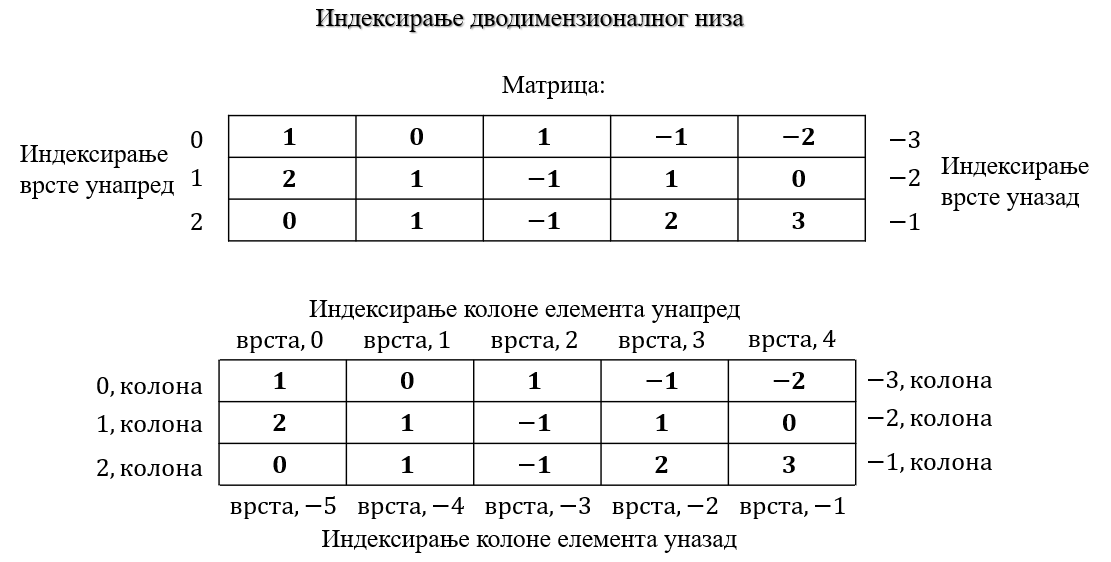  
</div>

Naredne kodne ćelije pomoći će da upoznamo indeksiranje matrica na primeru matrice dimenzije $3\times5$.

In [122]:
matrica=np.array([[1,0,1,-1,-2],[2,1,-1,1,0],[0,1,-1,2,3]])
print(matrica)
print(matrica[0])           #prva vrsta matrice
print(matrica[-1])          #poslednja vrsta matrice

[[ 1  0  1 -1 -2]
 [ 2  1 -1  1  0]
 [ 0  1 -1  2  3]]
[ 1  0  1 -1 -2]
[ 0  1 -1  2  3]


In [123]:
matrica[:2]        #prve dve vrste matrice

array([[ 1,  0,  1, -1, -2],
       [ 2,  1, -1,  1,  0]])

In [124]:
matrica[::2]      #vrste matrice sa korakom 2

array([[ 1,  0,  1, -1, -2],
       [ 0,  1, -1,  2,  3]])

In [125]:
B=matrica[[0,1,-1,0,2,0]]      #vrste matrice navedenih indeksa
B

array([[ 1,  0,  1, -1, -2],
       [ 2,  1, -1,  1,  0],
       [ 0,  1, -1,  2,  3],
       [ 1,  0,  1, -1, -2],
       [ 0,  1, -1,  2,  3],
       [ 1,  0,  1, -1, -2]])

In [126]:
B[0,0]=0
matrica

array([[ 1,  0,  1, -1, -2],
       [ 2,  1, -1,  1,  0],
       [ 0,  1, -1,  2,  3]])

Zaključujemo da je $B$ nezavisna kopija delova niza $matrica.$ Prema tome, dodela tipa `niz1=f(niz2)`, gde je `f` neka transformacija (obrada) višeg nivoa,  pravi nezavisne verzije nizova. 

In [127]:
C=matrica[[2,0,1]]
C

array([[ 0,  1, -1,  2,  3],
       [ 1,  0,  1, -1, -2],
       [ 2,  1, -1,  1,  0]])

In [128]:
C[0,0]=6
matrica

array([[ 1,  0,  1, -1, -2],
       [ 2,  1, -1,  1,  0],
       [ 0,  1, -1,  2,  3]])

Osim toga, vidimo da za indeksiranje pojedinačnih elemenata dvodimenzionanog niza koristimo parove indeksa razdvojene zarezom.

In [129]:
print(matrica)
matrica[1,2]         #element matrice na poziciji (2,3)

[[ 1  0  1 -1 -2]
 [ 2  1 -1  1  0]
 [ 0  1 -1  2  3]]


-1

In [130]:
print(B)
B[-2,-2]

[[ 0  0  1 -1 -2]
 [ 2  1 -1  1  0]
 [ 0  1 -1  2  3]
 [ 1  0  1 -1 -2]
 [ 0  1 -1  2  3]
 [ 1  0  1 -1 -2]]


2

Za izdvajanje podmatrica elemenata (elementi u preseku istaknutih vrsta i kolona) kombinuju se na prethodno prikazani načini. 

In [131]:
print(matrica)
matrica[:,2]        #treća kolona matrice

[[ 1  0  1 -1 -2]
 [ 2  1 -1  1  0]
 [ 0  1 -1  2  3]]


array([ 1, -1, -1])

In [132]:
matrica[::2,1::2]   #izdvajanje podmatrice sa indeksima vrsta i kolona [(1,3),(2,4)]

array([[ 0, -1],
       [ 1,  2]])

Kada indeksi vrsta i kolona ne podležu zakonitostima operatora listanja `:`, izdvajanje elmenata u preseku navedenih indeksa vrsta i indeksa kolona odvija se iz dve etape: najpre izdvajanje vrsta, a zatim u njima izdvajanje kolona (ili obrat).

In [133]:
print(matrica)
vrste=np.array([0,1])
kolone=np.array([0,1,4])
print(matrica[vrste])
print(matrica[:,kolone])

[[ 1  0  1 -1 -2]
 [ 2  1 -1  1  0]
 [ 0  1 -1  2  3]]
[[ 1  0  1 -1 -2]
 [ 2  1 -1  1  0]]
[[ 1  0 -2]
 [ 2  1  0]
 [ 0  1  3]]


In [134]:
matrica[vrste][:,kolone]

array([[ 1,  0, -2],
       [ 2,  1,  0]])

In [135]:
matrica[:,kolone][vrste]

array([[ 1,  0, -2],
       [ 2,  1,  0]])

Kao i kod jednodimenzionalnih nizova indeksiranje matrica može da se koristi za čitanje i izmenu njenog sadržaja. I ovde je veoma korisna istovremena zamena mesta sadržaja više pozicija unutar matrice.

In [136]:
print(matrica)
matrica[:,[0,4]]=matrica[:,[1,2]]   #izmena sadržaja prve i pete kolone upisivanjem druge i treće kolone u njih
matrica

[[ 1  0  1 -1 -2]
 [ 2  1 -1  1  0]
 [ 0  1 -1  2  3]]


array([[ 0,  0,  1, -1,  1],
       [ 1,  1, -1,  1, -1],
       [ 1,  1, -1,  2, -1]])

**Zadatak 2.** Napisati kod za:

a) Generisanje promenljive **a** koja je niz brojeva od 0,1,2,...,15. Brojeve ne unositi ručno već koristiti neku od naredbi NumPy modula za automatsko generisanje nizova.

b) Generisanje promenljive **b**, na osnovu postojećeg niza **a**, upotrebom operacija nad nizovima (+,-,\*,/ i slično). Elementi niza **b** glase -3, -1,  1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27. Uočiti pravilnost (linearna je) i iskoristiti je za kreiranje niza **b**.

c)  Indeksiranjem promeniti sadržaj vektora **a** prema sledećem pravilu:
$$[0\ 1\ 2\ 3\ 4\ 5\ 6\ 7\ 8\ 9\ 10\ 11\ 12\ 13\ 14\ 15]\ \mapsto\ [0\ 1\ 2\ 3\ 4\ 5\ -1\ 2\ -1\ 2\ 10\ 11\ 0\ 0\ 0\ 0]$$

In [137]:
a=np.arange(16)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [138]:
b=2*a-3
b

array([-3, -1,  1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27])

In [139]:
a[6:10]=2*[-1,2]
a

array([ 0,  1,  2,  3,  4,  5, -1,  2, -1,  2, 10, 11, 12, 13, 14, 15])

In [140]:
a[-4:]=4*[0]
a

array([ 0,  1,  2,  3,  4,  5, -1,  2, -1,  2, 10, 11,  0,  0,  0,  0])

**Zadatak 3.** Употребом индексирања креирати матрицу $A$ димензије $8\times8$ са јединицама на ивицама и нулама свуда другде, тј.
$$A=\begin{bmatrix}1&1&1&\dots&1&1&1\\1&0&0&\dots&0&0&1\\1&0&0&\dots&0&0&1\\\vdots&\vdots&\vdots& &\vdots&\vdots&\vdots\\
1&0&0&\dots&0&0&1\\1&0&0&\dots&0&0&1\\1&1&1&\dots&1&1&1
\end{bmatrix}.$$

In [141]:
A=np.ones((8,8))
A[1:-1,1:-1]=0
A

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

**Zadatak 4.** Индексирањем креирати матрицу $B$ димензије $8\times8$ са цик-цак распоредом нула и јединица, тј.
$$B=\begin{bmatrix}1&0&1&\dots&0&1&0\\0&1&0&\dots&1&0&1\\1&0&1&\dots&0&1&0\\\vdots&\vdots&\vdots& &\vdots&\vdots&\vdots\\
0&1&0&\dots&1&0&1\\1&0&1&\dots&0&1&0\\0&1&0&\dots&1&0&1
\end{bmatrix}.$$

In [142]:
B=np.ones((8,8))
B[::2,::2]=0
B[1::2,1::2]=0
B

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

**Zadatak 5.** Neka je $\varepsilon_n=e^{i\frac{2\pi}{n}},$ gde je $n=2^m,\ m\in\mathbb{N}.$ Za dati vektor vrednosti $$v=\begin{bmatrix}1&\varepsilon_n&\varepsilon_n^2&\dots&\varepsilon_n^{n/2-1}\end{bmatrix},$$ koristeći operator indeksiranja izdvojiti elemente ovog vektora prema pravilu:
$$u=\begin{bmatrix}1&\varepsilon_r&\varepsilon_r^{2}&\dots&\varepsilon_r^{r/2-1}\end{bmatrix},\quad r=2^q,\ q=\overline{1,m}.$$

**Rešenje :**

Napravićemo vektore $v$ i $u$ za neke konkretne, male vrednosti parametara $m$ i $q.$ Menjanjem $q=\overline{1,m}$ kroz grafički prikaz možemo da potvrdimo detaljnu analizu datu u nastavku.

In [143]:
m=6
n=2**m
fi=2*np.pi/n
epsl=np.exp(fi*1j)
v=epsl**np.arange(n/2)
v.shape

(32,)

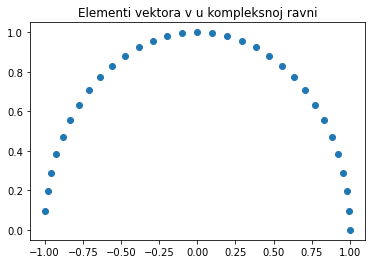

In [144]:
plt.plot(np.real(v),np.imag(v),'o')
plt.rcParams["figure.figsize"] = (6,3)
plt.title("Elementi vektora v u kompleksnoj ravni");

Zamenom vrednosti $q$ u nastavku možemo da pratimo ponašanje elemenata podniza $u.$

In [145]:
q=3
r=2**q
psi=2*np.pi/r
epsr=np.exp(psi*1j)
u=epsr**np.arange(r/2)
u.shape

(4,)

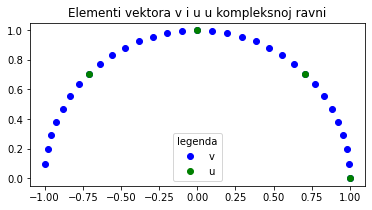

In [146]:
plt.plot(np.real(v),np.imag(v),'ob',label='v')
plt.plot(np.real(u),np.imag(u),'og',label='u')
plt.rcParams["figure.figsize"] = (6,3)
plt.title("Elementi vektora v i u u kompleksnoj ravni")
plt.legend(loc='lower center', title='legenda');

Primetimo da je
$$\varepsilon_r=e^{i\frac{2\pi}{r}}=e^{i\frac{2\pi}{2^q}}=e^{i\frac{2\pi}{2^{q-m+m}}}=e^{i\frac{2\pi}{2^m}2^{m-q}}
=\left(e^{i\frac{2\pi}{2^m}}\right)^{2^{m-q}}=\varepsilon_m^{2^{m-q}}.$$
Zbog toga, izdvajanje elemenata $\begin{bmatrix}1&\varepsilon_r&\varepsilon_r^{2}&\dots&\varepsilon_r^{r/2-1}\end{bmatrix},\quad r=2^q,\ q=\overline{1,m}$ znači izdvajanje elemenata vektora $v$ sa indeksima $\begin{bmatrix}0&2^{m-q}&2\cdot2^{m-q}&\dots&(r/2-1)2^{m-q}\end{bmatrix},\quad r=2^q,\ q=\overline{1,m}.$ Narednim kodom se to postiže.

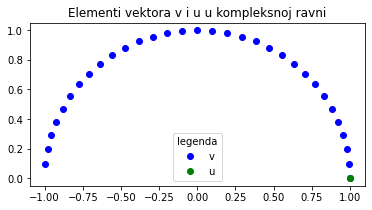

In [147]:
m=6
q=1
n=2**m
fi=2*np.pi/n
epsl=np.exp(fi*1j)
v=epsl**np.arange(n/2)

indeksi=np.arange(2**(q-1))*(2**(m-q))
uindks=v[indeksi]
plt.plot(np.real(v),np.imag(v),'ob',label='v')
plt.plot(np.real(uindks),np.imag(uindks),'og',label='u')
plt.rcParams["figure.figsize"] = (6,3)
plt.title("Elementi vektora v i u u kompleksnoj ravni")
plt.legend(loc='lower center', title='legenda');

**Primer 6.** Realizacija različitih načina izračunavanja proizvoda dve matrice $C=AB$ zavisi od konkretne arhitekture računara. Zbog toga ekvivalenetne matematičke formule se mogu izvršavati različitim brzinama. Proverićemo to narednim kodom. Operacije ćemo vršiti nad dvema matricama sa slučajno izabranim vrednostima.

In [148]:
m,n=20,15
A=rndm.rand(m,n)
B=rndm.rand(n,m)

Proverićemo prvo ugrađenu funkciju kako bismo razumeli prednosti ugrađene vektorizacije izračunavanja.

In [149]:
start = timer()
C=A@B
end = timer()
print("Vreme izvrsenja množenja: ",end - start,"sec")
#print("AB= ",np.round(C,3))

Vreme izvrsenja množenja:  6.41999995423248e-05 sec


Sledi izračunavanje proizvoda matrica preko unutrašnjih proizvoda odgovarajućih vektora.

In [150]:
start = timer()
C1=np.empty((m,m))  #alokacija memorijskog prostora za smestaj rezultata
for i in range(m):
    for j in range(m):
        C1[i,j]=np.dot(A[i],B[:,j])
end = timer()
print("Vreme izvrsenja množenja: ",end - start,"sec")

Vreme izvrsenja množenja:  0.0014567999987775693 sec


In [151]:
np.max(np.abs(C-C1))

1.7763568394002505e-15

Primenićemo sada izračunavanje proizvoda matrica preko spoljašnjih proizvoda odgovarajućih vektora.

In [152]:
start = timer()
C2=np.zeros((m,m))  
for i in range(n):
    C2+=np.outer(A[:,i],B[i])
end = timer()
print("Vreme izvrsenja množenja: ",end - start,"sec")

Vreme izvrsenja množenja:  0.00044779999916499946 sec


In [153]:
np.max(np.abs(C-C2))

0.0

Primenićemo sada izračunavanje proizvoda matrica preko proizvoda matrice i kolona.

In [154]:
start = timer()
C3=np.empty((m,m))  
for i in range(m):
    C3[:,i]=A@B[:,i]
end = timer()
print("Vreme izvrsenja množenja: ",end - start,"sec")

Vreme izvrsenja množenja:  0.00041959999907703605 sec


In [155]:
np.max(np.abs(C-C3))

0.0

Primenićemo sada izračunavanje proizvoda matrica preko proizvoda vrsta i matrice.

In [156]:
start = timer()
C4=np.empty((m,m))  #alokacija memorijskog prostora za smestaj rezultata
for i in range(m):
    C4[i]=A[i]@B
end = timer()
print("Vreme izvrsenja množenja: ",end - start,"sec")

Vreme izvrsenja množenja:  0.0004903999997623032 sec


In [157]:
np.max(np.abs(C-C4))

0.0